<html>
    <img src=https://th.bing.com/th/id/R.b3374ffe111d8d33380c6c1e81cbdd6c?rik=UNq5txVOUzDcww&riu=http%3a%2f%2fnewplayersnetwork.jetzt%2fwp-content%2fuploads%2f2020%2f01%2fhepster_neu.png&ehk=daAEOXDEbSE6HcuisOn8QU7PGxz6F3EFGYOV%2fbyeJ5o%3d&risl=&pid=ImgRaw&r=0 alt="Girl in a jacket" width="200" height="300">
   
</html>

<html>
    <div>
        <div style = "text-align: center"> 
            <h1>
            INSURANCE CASE STUDY
            </h1>
        </div>
        <div>
            <h3>
                 OBJECTIVE
            </h3>
            <p>
                Determine the credit score  as either good or bad for entries, using Logistic Regression.
            </p>
            <h3>
                 METHODOLOGY
            </h3>
            <p>
                <u>
                    <li>Load and Clean Data</li>
                    <li>Exploratory Data Analysis (EDA)</li>
                    <li>Feature Engineering</li>
                    <li>Classification with Logistic Regression</li>
                    <li>Model Evaluation</li>
                    <li>Classification with Random Forest</li>
                    <li>Improving Accuracy</li>
                    <li>Export CSV</li>
                    <li>Reporting and Visualization</li>
                </u>
            </p>
            <h3>
                APPENDIX
            </h3>
        </div>
      </div>
    </html>


<html>
 </html>

In [8]:
# import the neccesary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [156]:
import string
import streamlit as st
import joblib

In [157]:
#ML packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
#transformers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#build pipeline
from sklearn.pipeline import Pipeline

## LOAD AND CLEAN DATA

In [52]:

# import data
df = pd.read_csv('../data/case_hepster.csv',sep = ';')
df.head().T

,0,1,2,3,4
row ID,Row0,Row1,Row2,Row3,Row4
Status of existing checking account,Negative,0 - 200,No checking account,Negative,Negative
Duration in months,6,48,12,42,24
Credit history,critical account/ other credits existing (not ...,existing credits paid back duly till now,critical account/ other credits existing (not ...,existing credits paid back duly till now,delay in paying off in the past
Purpose,radio/television,radio/television,education,furniture/equipment,car (new)
Credit amount,1169,5951,2096,7882,4870
Savings account/bonds,unknown / no savings account,less than 100,less than 100,less than 100,less than 100
Present employment since,more than 7 years,1 to 4 years,4 to 7 years,4 to 7 years,1 to 4 years
Installment rate in percentage of disposable income,4,2,2,2,3
Personal status and sex,male (single),female (divorced/separated/married),male (single),male (single),male (single)


In [53]:
#looking at the dimension of the dataset, we observe 
# 1000 rows and 22 columns
# further analysis on  the columns 
print(df.shape)
print(df.columns)

(1000, 22)
Index(['row ID', 'Status of existing checking account', 'Duration in months',
       'Credit history', 'Purpose', 'Credit amount', 'Savings account/bonds',
       'Present employment since',
       'Installment rate in percentage of disposable income',
       'Personal status and sex', 'Other debtors / guarantors',
       'Present residence since', 'Property', 'Age in years',
       'Other installment plans', 'Housing',
       'Number of existing credits at this bank', 'Job',
       'Number of people being liable to provide maintenance for', 'Telephone',
       'Foreign worker', 'Score'],
      dtype='object')


In [153]:
df.apply(lambda x: sum(x.isnull()))
#data does not have any missing values in the columns

ID                         0
Status                     0
Duration                   0
Credit history             0
Purpose                    0
Credit_Amount              0
Saving_acccount_bonds      0
Installment_Rate           0
Installment_Rate/Income    0
Personal status and sex    0
Debtors_Guarantors         0
Resident_Years             0
Property                   0
Age                        0
Other_Installment_Plans    0
Housing                    0
No_Credits                 0
Job                        0
Dependents                 0
Telephone                  0
Foreign_Worker             0
Score                      0
Sex                        0
dtype: int64

__Column Changes__

From the columns above, the column headers are very long and it is not ideal when it comes to indexing. 
Next step will be on creating a function to rename the columns. The columns to be changed include:


|Current | Change |
|--------|--------|
|row ID| ID|
|Status of existing checking account| Status|
|Duration in months | Duration|
|Credit amount | Credit_Amount|
|Savings account/bonds | Savings_account_bonds|
|Present Employment | Employment_Duration|
|Installment rate in percentage of disposable income | Installament_Rate|
|Personal status and sex | Status|
|Personal status and sex | Sex|
|Other debtors / guarantors | Debtors_Guarantors|
|Present residence since | Resident_Years|
|Age in years | Age|
|Other installment plans | Other_installment_plans|
|Number of existing credits at this bank  | No_Credits|
|Number of people being liable to provide maintenance for | Dependents
|Foreign worker | Foreign_worker|





In [54]:
df.rename(columns = {'row ID':'ID', 'Status of existing checking account'
                    : 'Status','Duration in months':'Duration','Credit amount':'Credit_Amount',
                    'Savings account/bonds':'Saving_acccount_bonds','Present employment since':'Installment_Rate'
                    ,'Other debtors / guarantors': 'Debtors_Guarantors','Present residence since':'Resident_Years',
                    'Age in years':'Age','Other installment plans':'Other_Installment_Plans',
                    'Number of existing credits at this bank':'No_Credits','Number of people being liable to provide maintenance for':'Dependents',
                    'Foreign worker':'Foreign_Worker', 'Installment rate in percentage of disposable income': 'Installment_Rate/Income'}, inplace = True)

In [55]:
df.nunique()

ID                         1000
Status                        4
Duration                     33
Credit history                5
Purpose                      10
Credit_Amount               921
Saving_acccount_bonds         5
Installment_Rate              5
Installment_Rate/Income       4
Personal status and sex       4
Debtors_Guarantors            3
Resident_Years                4
Property                      4
Age                          53
Other_Installment_Plans       3
Housing                       3
No_Credits                    4
Job                           4
Dependents                    2
Telephone                     2
Foreign_Worker                2
Score                         2
dtype: int64

### Defining the problem statement
_Creative a predictive model which can tell the credit scoring of an applicant as either good or bad_
* Target variable - Score
* Predictors 

### Determining the type of Machine Learning
Based on the problem statement we will need to create a supervised ML classification model, as the target variable is categorical.

### Distribution of the Target variable
If the variable distribution is too skewed then the predictive model will not be possibl, a bell curve or norla is desirable but a slightly positive or negative skew is also fine. Balancing in the classes impacts the Machine learning algorithm ability to learn the classes.

In [47]:
grouped_data = df.groupby('Score').size()
print(grouped_data)
px.histogram(df, x = 'Score', title = 'Score Distribution as Good or Bad' )

Score
bad     300
good    700
dtype: int64


### Basic Data Exploration
 Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.
 This will help start the column dropping process , clear '__NO__' columns will be removed (does it really affect the output of the results?) 
 Row_ID is one such column

In [48]:
df.head()

,ID,Status,Duration,Credit history,Purpose,Credit_Amount,Saving_acccount_bonds,Installment_Rate,Installment_Rate/Income,Personal status and sex,...,Property,Age,Other_Installment_Plans,Housing,No_Credits,Job,Telephone,Telephone,Foreign_Worker,Score
0,Row0,Negative,6,critical account/ other credits existing (not ...,radio/television,1169,unknown / no savings account,more than 7 years,4,male (single),...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",Yes,good
1,Row1,0 - 200,48,existing credits paid back duly till now,radio/television,5951,less than 100,1 to 4 years,2,female (divorced/separated/married),...,real estate,22,none,own,1,skilled employee / official,1,none,Yes,bad
2,Row2,No checking account,12,critical account/ other credits existing (not ...,education,2096,less than 100,4 to 7 years,2,male (single),...,real estate,49,none,own,1,unskilled - resident,2,none,Yes,good
3,Row3,Negative,42,existing credits paid back duly till now,furniture/equipment,7882,less than 100,4 to 7 years,2,male (single),...,building society savings agreement/ life insur...,45,none,for free,1,skilled employee / official,2,none,Yes,good
4,Row4,Negative,24,delay in paying off in the past,car (new),4870,less than 100,1 to 4 years,3,male (single),...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,Yes,bad


In [49]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       1000 non-null   object
 1   Status                   1000 non-null   object
 2   Duration                 1000 non-null   int64 
 3   Credit history           1000 non-null   object
 4   Purpose                  1000 non-null   object
 5   Credit_Amount            1000 non-null   int64 
 6   Saving_acccount_bonds    1000 non-null   object
 7   Installment_Rate         1000 non-null   object
 8   Installment_Rate/Income  1000 non-null   int64 
 9   Personal status and sex  1000 non-null   object
 10  Debtors_Guarantors       1000 non-null   object
 11  Resident_Years           1000 non-null   int64 
 12  Property                 1000 non-null   object
 13  Age                      1000 non-null   int64 
 14  Other_Installment_Plans  1000 non-null   

In [50]:
# Looking at the descriptive statistics of the data
df.describe()

,Duration,Credit_Amount,Installment_Rate/Income,Resident_Years,Age,No_Credits,Telephone
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [56]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
df.nunique()

ID                         1000
Status                        4
Duration                     33
Credit history                5
Purpose                      10
Credit_Amount               921
Saving_acccount_bonds         5
Installment_Rate              5
Installment_Rate/Income       4
Personal status and sex       4
Debtors_Guarantors            3
Resident_Years                4
Property                      4
Age                          53
Other_Installment_Plans       3
Housing                       3
No_Credits                    4
Job                           4
Dependents                    2
Telephone                     2
Foreign_Worker                2
Score                         2
dtype: int64

## Exploration Results
The above analysis will help in building up an initial roadmap for further analysis.
* ID : Qualitaitive __drop__
* Duration: Quantitative __keep__
* Credit history : Qualitative __keep__
* Purpose: Qualitaive __drop__
* Credit_Amount : Quantitaive __keep__
* Saving_account_bonds: Qualitative __keep__
* Installment_Rate: Qualitative __keep__
* Installment/income: Quantitative __keep__
* Personal status and sex : Qualitative __keep__
* Debtors_Guarantors: Qualitaive __keep__
* Resident_Years: Quantitaive __keep_
* Property: Categorical __keep__
* Age: Quantitative __keep__
* Other_Installment_Plans : Categorical __keep__
* Housing - Categorical __keep__
* No_Credits - Categorical __keep__    
* Job - Categorical __keep__
* Dependants - Categorical __keep__
* Telephone -Categorical __keep__
* Foreign_Worker - Categorical __keep__
* Score: Categorical (__Target_Variable__)   

Kindly note that the personal sex and status has to be splitted in order to derive data from the two seperate information.


In [58]:
# we shall seperate from the space and the first open parenthesis
df[['Personal status and sex']]

,Personal status and sex
0,male (single)
1,female (divorced/separated/married)
2,male (single)
3,male (single)
4,male (single)
...,...
995,female (divorced/separated/married)
996,male (divorced/separated)
997,male (single)
998,male (single)


In [60]:
# split the column 
df[['Sex', 'Status']] = df['Personal status and sex'].str.split(' ', 1, expand = True)

In [79]:
df['Status'] = df['Status'].astype(str).str.replace(r")",'')

In [81]:
df.head()

,ID,Status,Duration,Credit history,Purpose,Credit_Amount,Saving_acccount_bonds,Installment_Rate,Installment_Rate/Income,Personal status and sex,...,Age,Other_Installment_Plans,Housing,No_Credits,Job,Dependents,Telephone,Foreign_Worker,Score,Sex
0,Row0,single,6,critical account/ other credits existing (not ...,radio/television,1169,unknown / no savings account,more than 7 years,4,male (single),...,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",Yes,good,male
1,Row1,divorced/separated/married,48,existing credits paid back duly till now,radio/television,5951,less than 100,1 to 4 years,2,female (divorced/separated/married),...,22,none,own,1,skilled employee / official,1,none,Yes,bad,female
2,Row2,single,12,critical account/ other credits existing (not ...,education,2096,less than 100,4 to 7 years,2,male (single),...,49,none,own,1,unskilled - resident,2,none,Yes,good,male
3,Row3,single,42,existing credits paid back duly till now,furniture/equipment,7882,less than 100,4 to 7 years,2,male (single),...,45,none,for free,1,skilled employee / official,2,none,Yes,good,male
4,Row4,single,24,delay in paying off in the past,car (new),4870,less than 100,1 to 4 years,3,male (single),...,53,none,for free,2,skilled employee / official,2,none,Yes,bad,male


In [84]:
# dropping columns that will not be used
column_drop = ['ID','Purpose','Personal status and sex']
df_new = df.drop(column_drop, axis = 1)
df_new.head()

,Status,Duration,Credit history,Credit_Amount,Saving_acccount_bonds,Installment_Rate,Installment_Rate/Income,Debtors_Guarantors,Resident_Years,Property,Age,Other_Installment_Plans,Housing,No_Credits,Job,Dependents,Telephone,Foreign_Worker,Score,Sex
0,single,6,critical account/ other credits existing (not ...,1169,unknown / no savings account,more than 7 years,4,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",Yes,good,male
1,divorced/separated/married,48,existing credits paid back duly till now,5951,less than 100,1 to 4 years,2,none,2,real estate,22,none,own,1,skilled employee / official,1,none,Yes,bad,female
2,single,12,critical account/ other credits existing (not ...,2096,less than 100,4 to 7 years,2,none,3,real estate,49,none,own,1,unskilled - resident,2,none,Yes,good,male
3,single,42,existing credits paid back duly till now,7882,less than 100,4 to 7 years,2,guarantor,4,building society savings agreement/ life insur...,45,none,for free,1,skilled employee / official,2,none,Yes,good,male
4,single,24,delay in paying off in the past,4870,less than 100,1 to 4 years,3,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,Yes,bad,male


### Visualize distribution of all the categorical Predictor variables in the data using bar plots
A categorical variable typically contians < 20 variables (unique) and there is a repetition of the variables, therefore the data can be grouped.

In [104]:
# define a function that will print the data in subplots
def PlotBar(inData, colsToPlot):
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40,10))
    
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

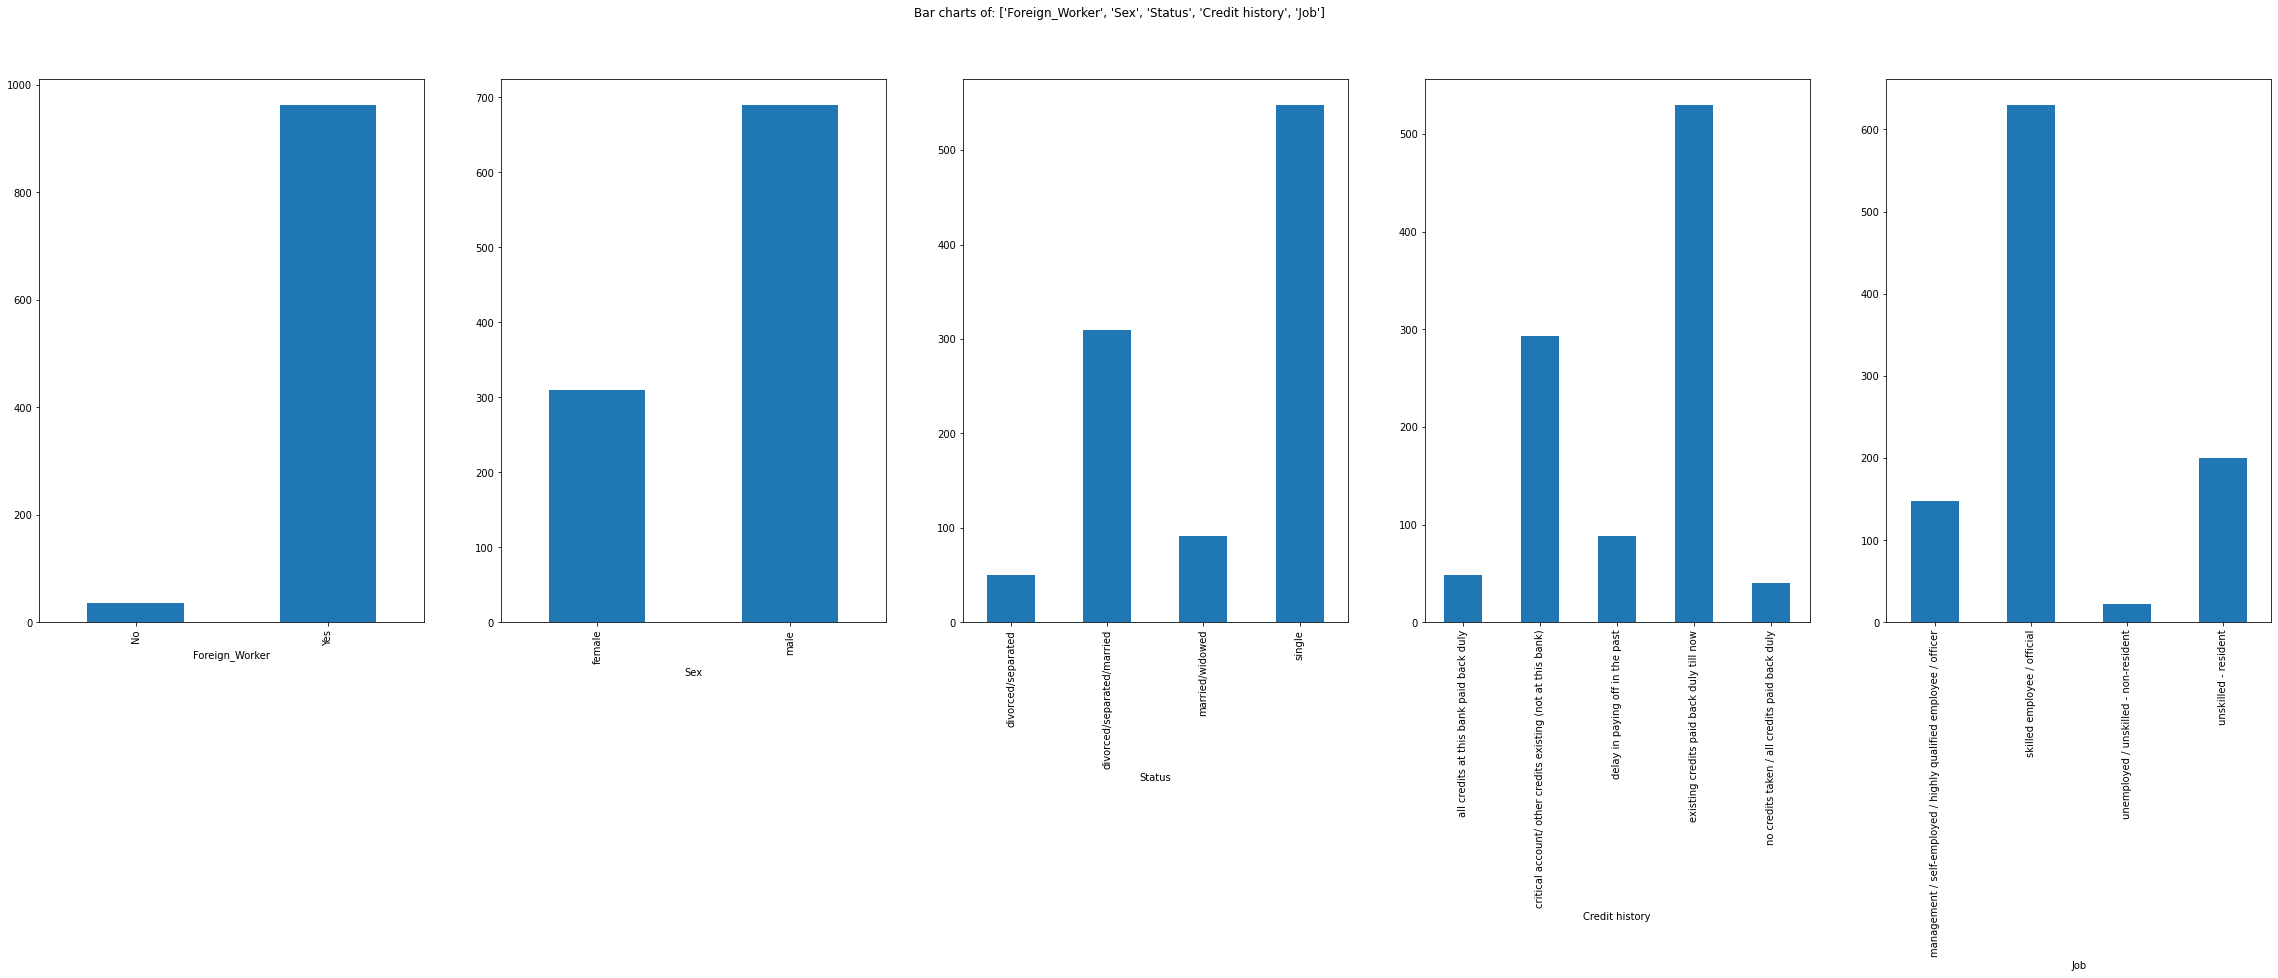

In [109]:
PlotBar(inData=df_new, colsToPlot=['Foreign_Worker','Sex','Status','Credit history'
                                  ,'Job'])

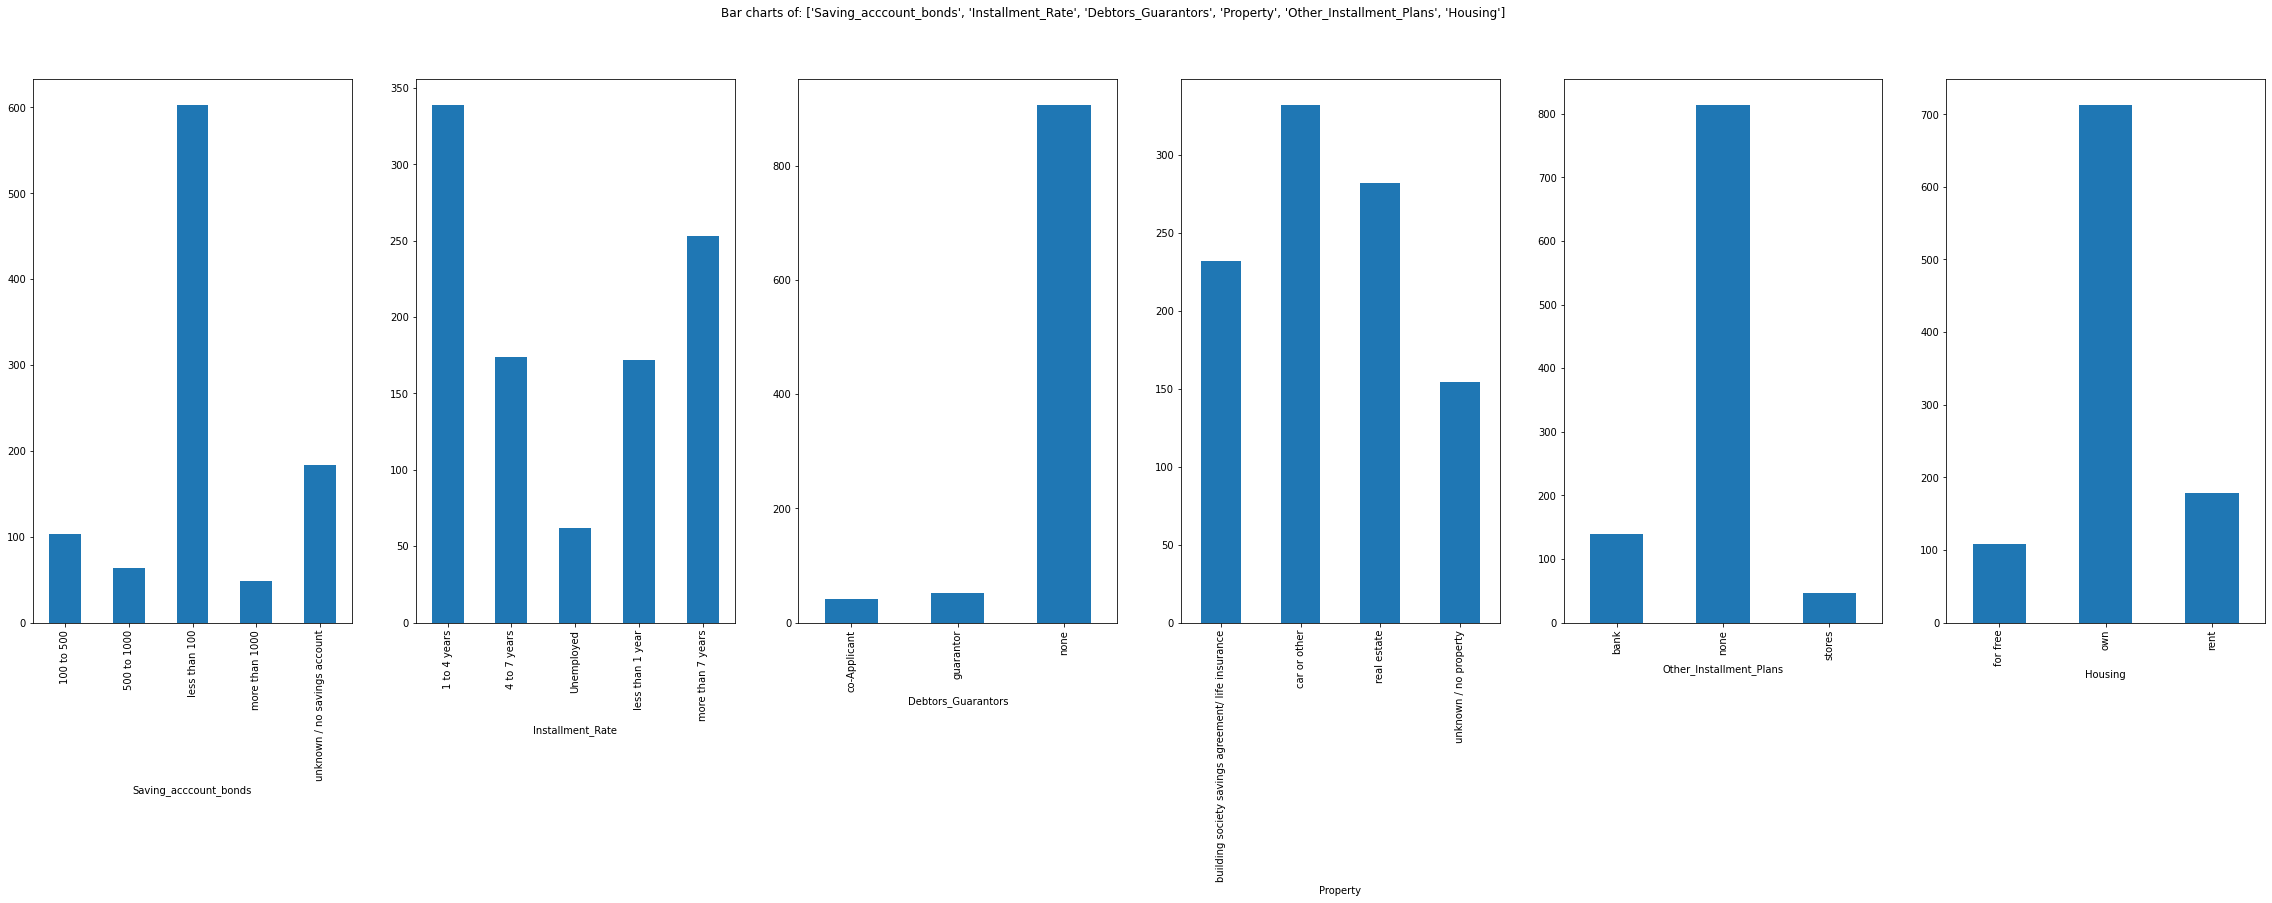

In [108]:
PlotBar(inData=df_new, colsToPlot=['Saving_acccount_bonds','Installment_Rate','Debtors_Guarantors'
                                  , 'Property','Other_Installment_Plans','Housing'])

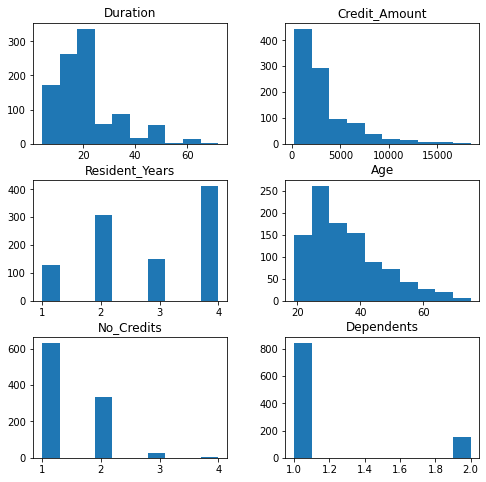

In [122]:
# Visualize the distribution of all the continuous Predictor variables
df_new.hist(['Duration', 'Credit_Amount','Resident_Years', 'Age','No_Credits'
            ,'Dependents'], figsize=(8,8), grid = False)
plt.show()

## Feature Selection
Now its time to finally choose the best columns(Features) which are correlated to the Target variable. This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

### Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots
### Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test
In this case study the Target variable is categorical, hence below two scenarios will be present
* Categorical Target Variable Vs Continuous Predictor
* Categorical Target Variable Vs Categorical Predictor

### Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using bar plots/Boxplots and measure the strength of relation using Anova test


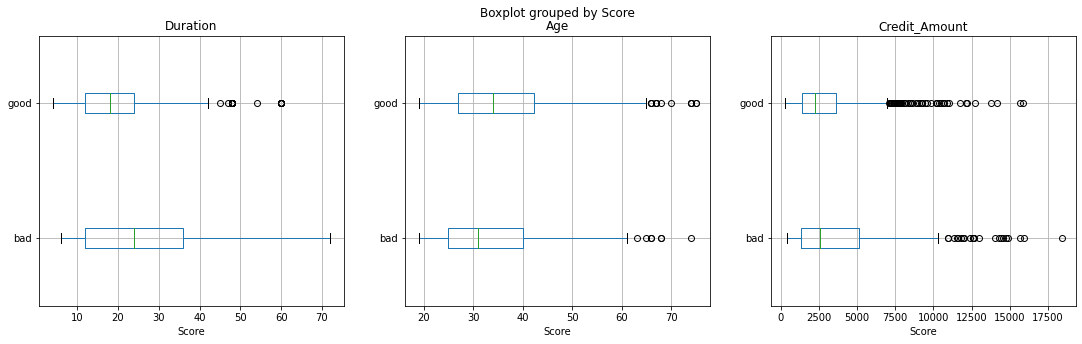

In [128]:
# Box plots for Categorical Target Variable "Loan_Status" and continuous predictors
ContinuousColsList=['Duration','Age', 'Credit_Amount']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    df_new.boxplot(column=PredictorCol, by='Score', figsize=(6,5), vert= False, ax=PlotCanvas[i])

#### Box Plot Interpretation
The box plots give us an idea aboout the data dsitribution in ther Y-axis for each od the catefory in the X-axis.
If the distribution looks similar for each category (boxes are in the same line) the continuous variable hs NO effect on the target variable. Hence variable are not correlated to each other.

We can confirm this by looking at the results of ANOVA test

## Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
ANOVA Test result: Probability of H0 being true


In [141]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('_________ANOVA Results___________ \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [142]:
ContinuousColsList=['Duration','Age', 'Credit_Amount','No_Credits','Dependents','Resident_Years','Installment_Rate/Income']
FunctionAnova(inpData=df_new, TargetVariable='Score', ContinuousPredictorList=ContinuousColsList)


_________ANOVA Results___________ 

Duration is correlated with Score | P-Value: 6.488049877187189e-12
Age is correlated with Score | P-Value: 0.003925339398278295
Credit_Amount is correlated with Score | P-Value: 8.797572373533373e-07
No_Credits is NOT correlated with Score | P-Value: 0.1484197860805063
Dependents is NOT correlated with Score | P-Value: 0.9241408780993021
Resident_Years is NOT correlated with Score | P-Value: 0.9253374212983783
Installment_Rate/Income is correlated with Score | P-Value: 0.022035486306960176


['Duration', 'Age', 'Credit_Amount', 'Installment_Rate/Income']

In [135]:
df_new.columns

Index(['Status', 'Duration', 'Credit history', 'Credit_Amount',
       'Saving_acccount_bonds', 'Installment_Rate', 'Installment_Rate/Income',
       'Debtors_Guarantors', 'Resident_Years', 'Property', 'Age',
       'Other_Installment_Plans', 'Housing', 'No_Credits', 'Job', 'Dependents',
       'Telephone', 'Foreign_Worker', 'Score', 'Sex'],
      dtype='object')

### Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts
When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them visually using barplots and statistically using Chi-square test

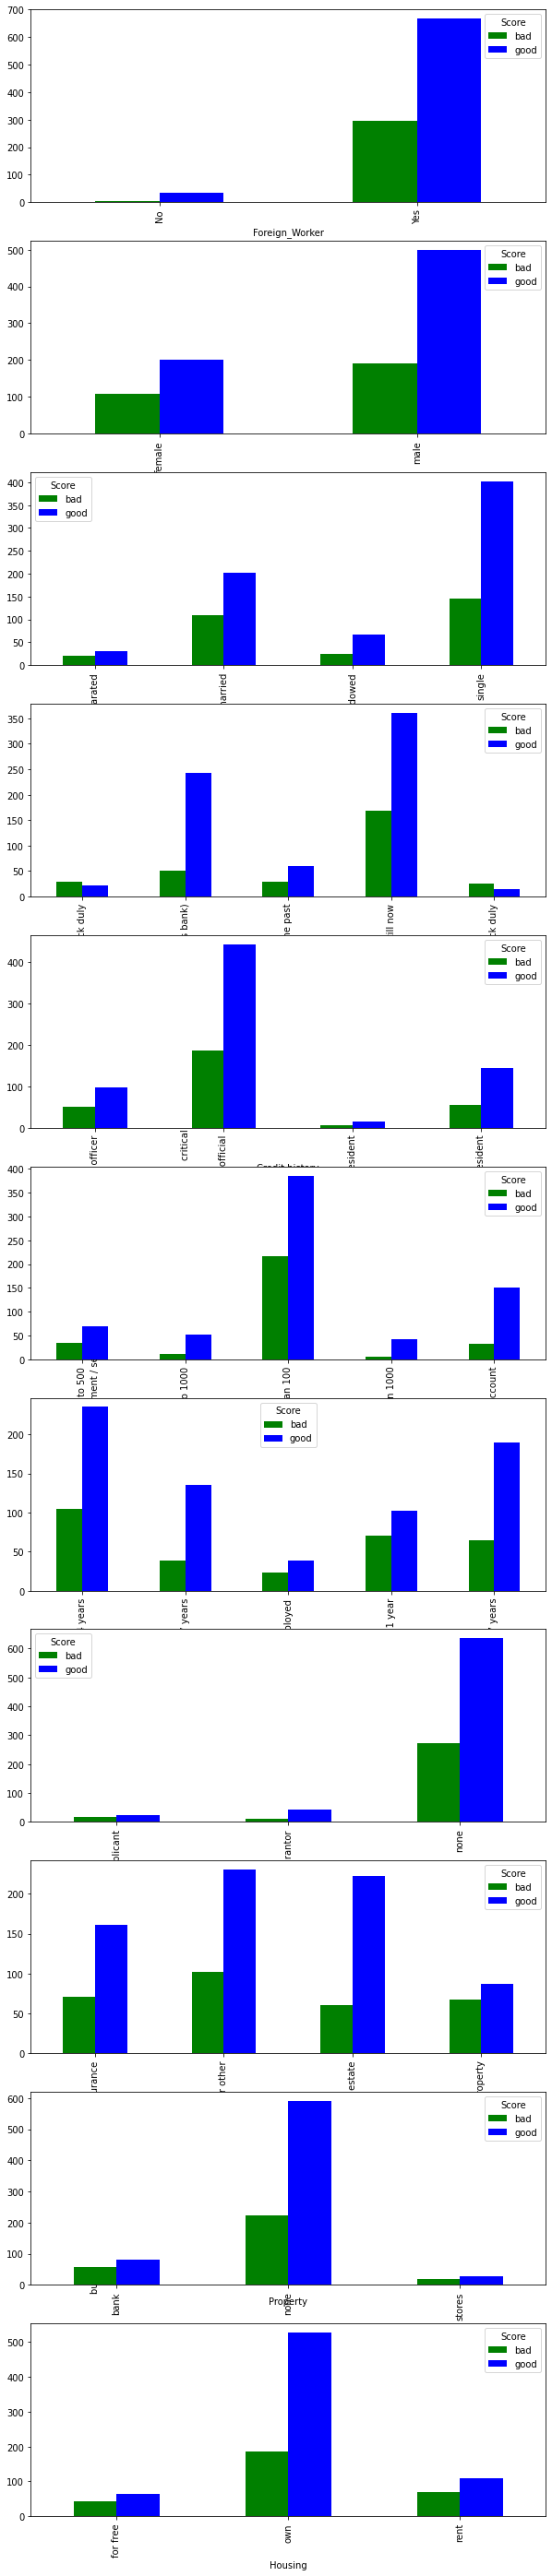

In [146]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['Foreign_Worker','Sex','Status','Credit history','Job','Saving_acccount_bonds','Installment_Rate','Debtors_Guarantors'
                , 'Property','Other_Installment_Plans','Housing']

fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,50))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Loan_Status"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=df_new[CategoricalCol], columns=df_new['Score'])
    CrossTabResult.plot.bar(color=['green','blue'], ax=PlotCanvas[i])

### Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test
Chi-Square test is conducted to check the correlation between two categorical variables

Assumption(H0): The two columns are NOT related to each other
Result of Chi-Sq Test: The Probability of H0 being True
More information on ChiSq: https://www.mathsisfun.com/data/chi-square-test.html

In [148]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [151]:
CategoricalColsList=['Foreign_Worker','Sex','Status','Credit history','Job','Saving_acccount_bonds','Installment_Rate','Debtors_Guarantors'
                , 'Property','Other_Installment_Plans','Housing']
# Calling the function
FunctionChisq(inpData=df_new,TargetVariable='Score',CategoricalVariablesList= CategoricalColsList)

Foreign_Worker is correlated with Score | P-Value: 0.015830754902852885
Sex is correlated with Score | P-Value: 0.020739913068713305
Status is correlated with Score | P-Value: 0.02223800546926877
Credit history is correlated with Score | P-Value: 1.2791872956750918e-12
Job is NOT correlated with Score | P-Value: 0.5965815918843431
Saving_acccount_bonds is correlated with Score | P-Value: 2.761214238568249e-07
Installment_Rate is correlated with Score | P-Value: 0.0010454523491402541
Debtors_Guarantors is correlated with Score | P-Value: 0.036055954027247206
Property is correlated with Score | P-Value: 2.8584415733250017e-05
Other_Installment_Plans is correlated with Score | P-Value: 0.0016293178186473534
Housing is correlated with Score | P-Value: 0.00011167465374597684


['Foreign_Worker',
 'Sex',
 'Status',
 'Credit history',
 'Saving_acccount_bonds',
 'Installment_Rate',
 'Debtors_Guarantors',
 'Property',
 'Other_Installment_Plans',
 'Housing']

Hence this categorical columns  'Foreign_Worker', 'Sex', 'Status', 'Credit history', 'Saving_acccount_bonds', 'Installment_Rate', 'Debtors_Guarantors',
'Property', 'Other_Installment_Plans', 'Housing' are predictors of the score

## Data Pre-Processing for machine learning

1. Binary Nominal Variables - using 1/0 mapping
2. Nominal Variable - get_dummies()

In [161]:
df_new.sample(5)

,Status,Duration,Credit history,Credit_Amount,Saving_acccount_bonds,Installment_Rate,Installment_Rate/Income,Debtors_Guarantors,Resident_Years,Property,Age,Other_Installment_Plans,Housing,No_Credits,Job,Dependents,Telephone,Foreign_Worker,Score,Sex
744,single,39,critical account/ other credits existing (not ...,14179,unknown / no savings account,4 to 7 years,4,none,4,building society savings agreement/ life insur...,30,none,own,2,management / self-employed / highly qualified ...,1,"yes, registered under the customers name",Yes,good,male
247,single,6,no credits taken / all credits paid back duly,1204,100 to 500,1 to 4 years,4,none,1,unknown / no property,35,bank,rent,1,skilled employee / official,1,none,No,good,male
832,single,45,no credits taken / all credits paid back duly,11816,less than 100,more than 7 years,2,none,4,car or other,29,none,rent,2,skilled employee / official,1,none,Yes,bad,male
992,married/widowed,18,existing credits paid back duly till now,1936,unknown / no savings account,4 to 7 years,2,none,4,car or other,23,none,rent,2,unskilled - resident,1,none,Yes,good,male
773,single,24,critical account/ other credits existing (not ...,2223,100 to 500,more than 7 years,4,none,4,building society savings agreement/ life insur...,52,bank,own,2,skilled employee / official,1,none,Yes,good,male


In [1]:
pwd

'C:\\Users\\LUGAPEDE\\OneDrive - B. Braun\\Documents\\BIDA\\Loan_Prediction with ML\\Student Downloads\\Python Notebooks'